In [1]:
import cv2
import numpy as np
import fnc
import matplotlib.pyplot as plt
from skimage import io
import os
from imutils.perspective import four_point_transform

Text(0.5, 1.0, 'edged')

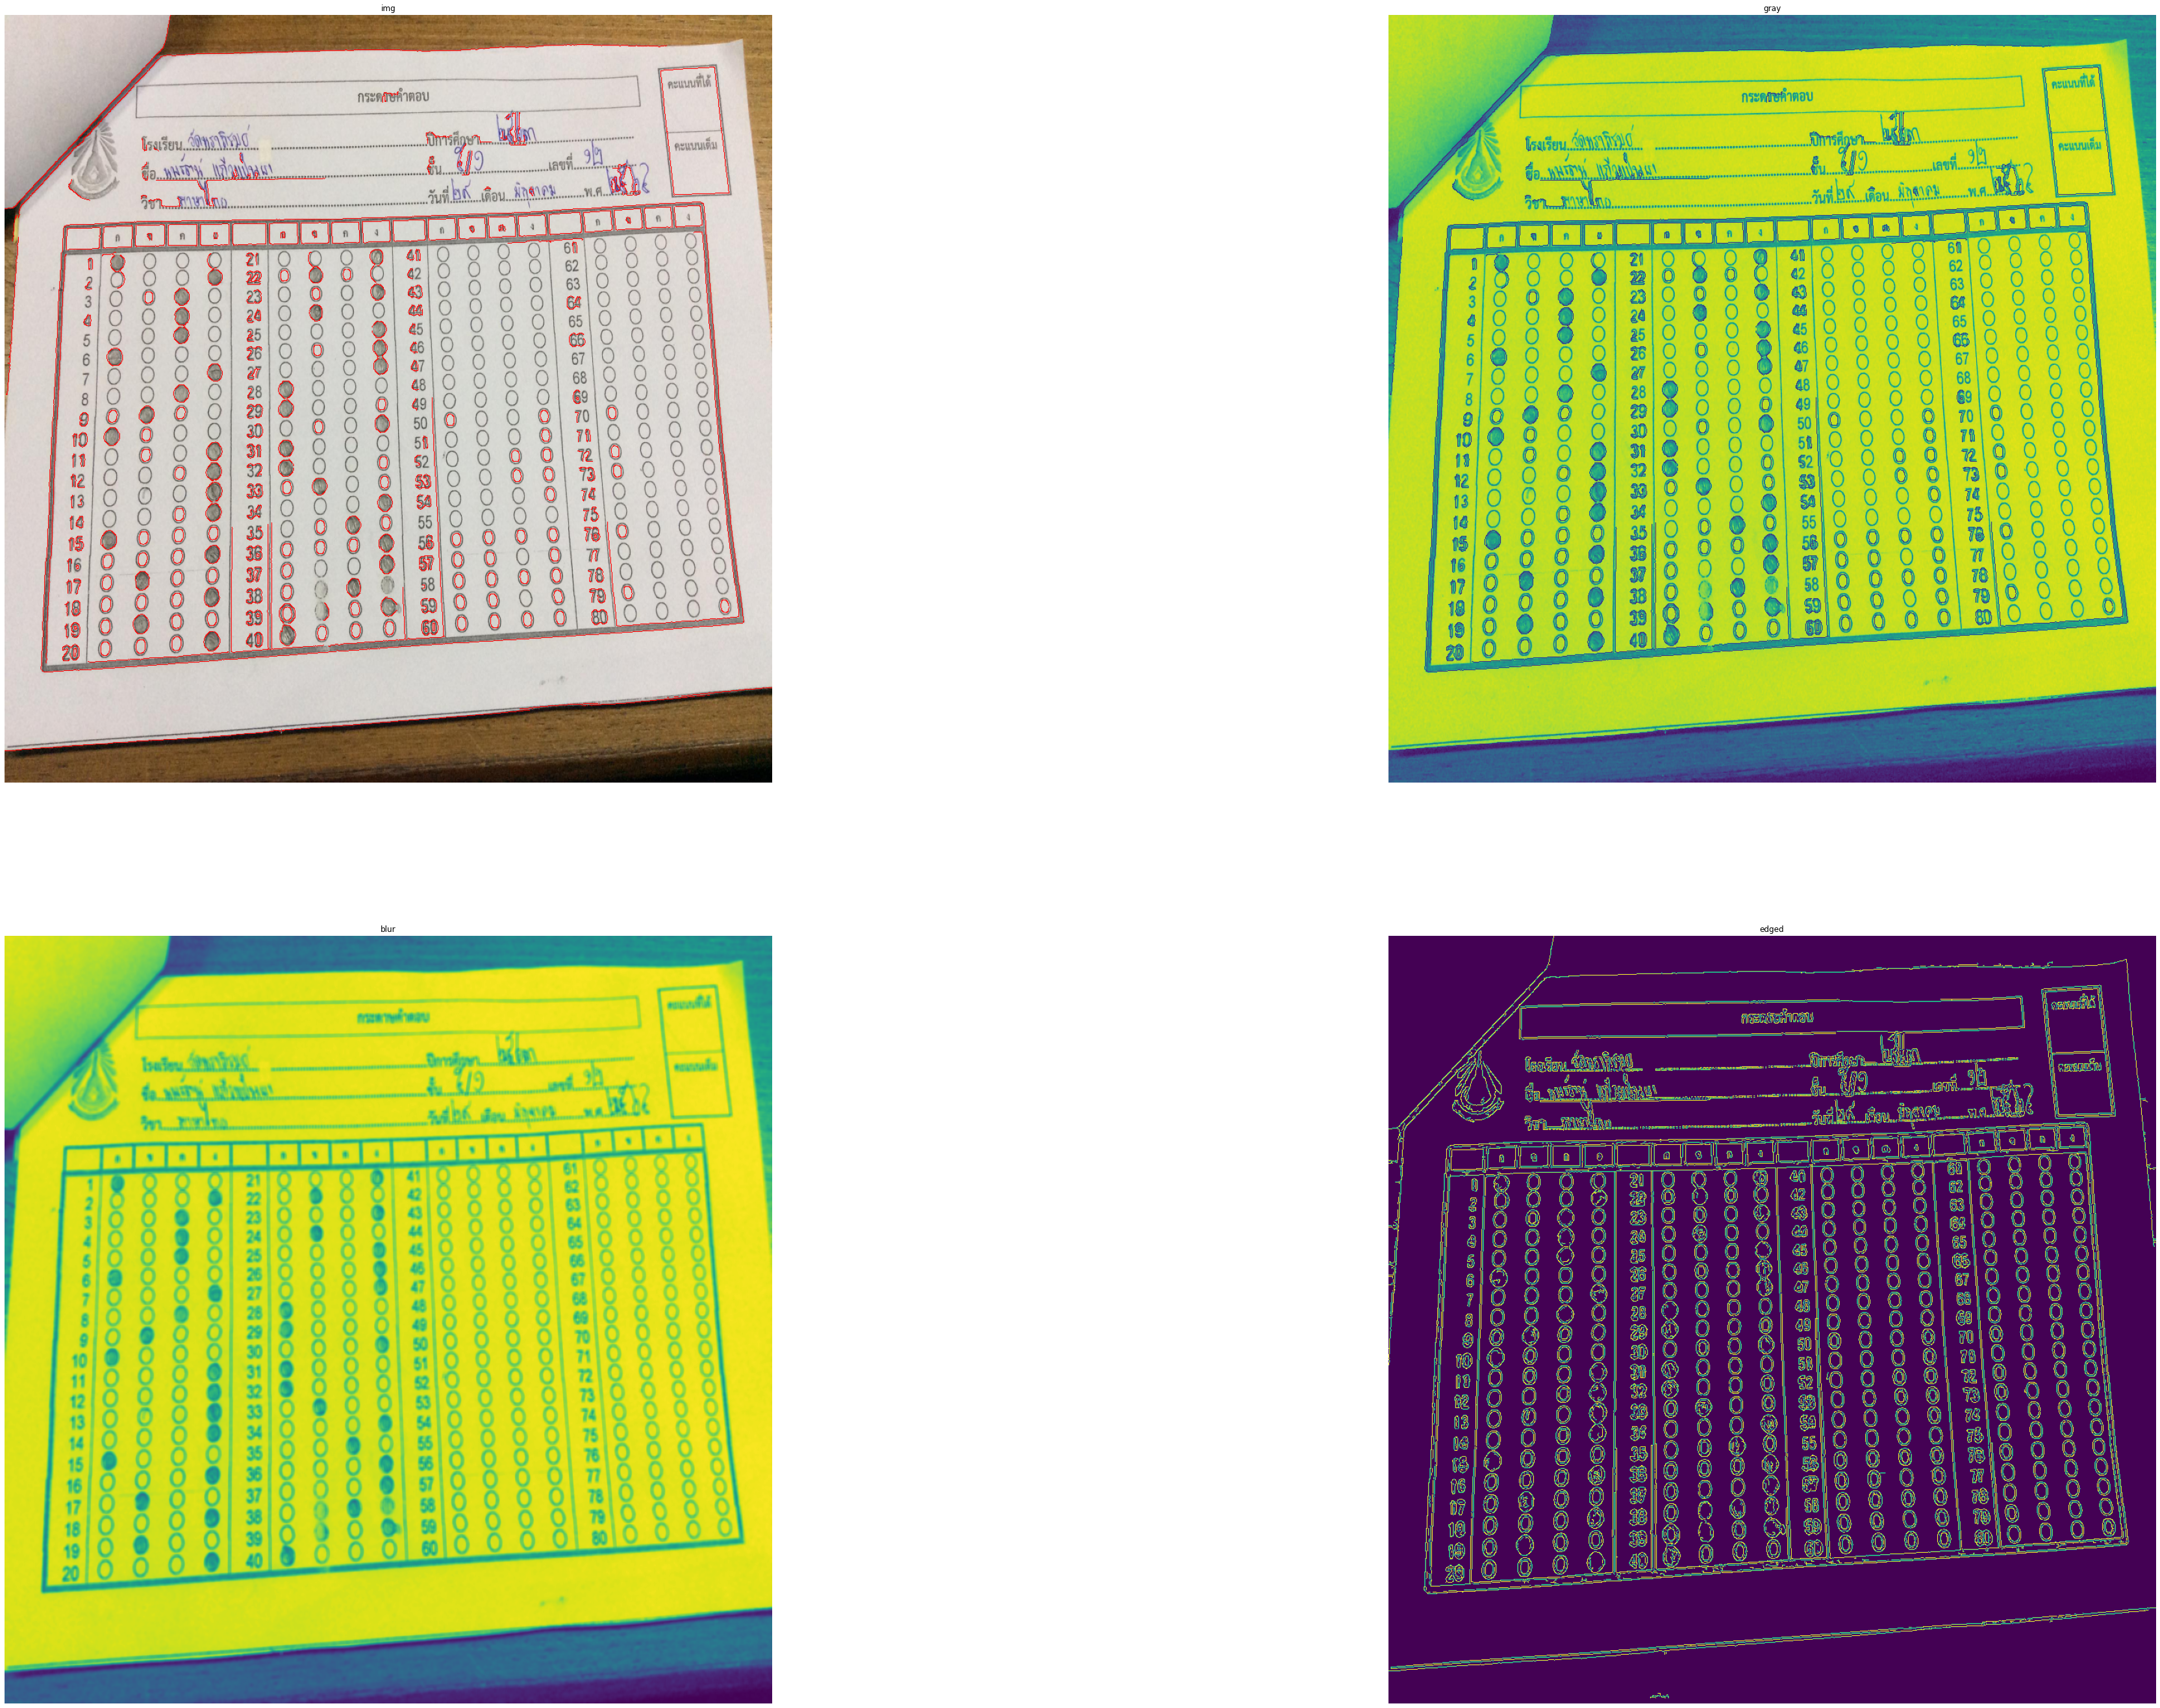

In [2]:
pathImage = 'img\\th5112.jpg'
heightImg = 1024
widthImg  = 1024
questions=80
choices=5
fig = plt.figure(figsize=(70, 100))
rows=4
columns=2
green = (255, 0, 0)

img = io.imread(pathImage)
img = cv2.resize(img, (widthImg, heightImg))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
blur = cv2.GaussianBlur(gray, (5, 5), cv2.BORDER_DEFAULT)
edged = cv2.Canny(blur, 100, 200)
contours, _ = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE )
contours = sorted(contours, key=cv2.contourArea, reverse=True)
cv2.drawContours(img, contours, -1, green, 1)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
edged = cv2.Canny(gray, 350, 50)
contours, _ = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE )
contours = sorted(contours, key=cv2.contourArea, reverse=True)

fig.add_subplot(rows, columns, 1)
plt.imshow(img)
plt.axis('off')
plt.title("img")

fig.add_subplot(rows, columns, 2)
plt.imshow(gray)
plt.axis('off')
plt.title("gray")

fig.add_subplot(rows, columns, 3)
plt.imshow(blur)
plt.axis('off')
plt.title("blur")

fig.add_subplot(rows, columns, 4)
plt.imshow(edged)
plt.axis('off')
plt.title("edged")

Text(0.5, 1.0, 'warped')

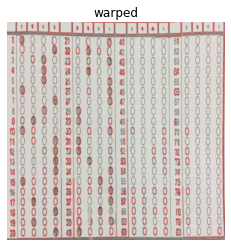

In [3]:
for contour in contours:
    peri = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.05 * peri, True)
    if len(approx) == 4:
        doc_cnts = approx
        break
warped = four_point_transform(img, doc_cnts.reshape(4, 2))
#warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
warped = cv2.resize(warped, (1280, 1280))
y = 20
x = 20
h = 1260
w = 1260
crop = warped[y:y + h, x:x + w]
warped = cv2.resize(crop, (1260, 1260))

fig.add_subplot(rows, columns, 5)
plt.imshow(img)
plt.axis('off')
plt.title("img")

fig.add_subplot(rows, columns, 6)
plt.imshow(warped)
plt.axis('off')
plt.title("warped")

จบการตัดรูป

In [4]:
def splitBoxes(img,_row,_col):
    rows = np.vsplit(img, _row)
    boxes = []
    for r in rows:
        cols = np.hsplit(r, _col)
        for box in cols:
            boxes.append(box)
    return boxes
def splitBoxes_t(img):
    rows = np.vsplit(img, 1)
    boxes = []
    for r in rows:
        cols = np.hsplit(r, 5)
        for box in cols:
            boxes.append(box)
    return boxes

In [5]:
Boxes_Row=[]
Box=[[]]
if contour.size != 0:
    Boxes_Col= splitBoxes(warped,1,4)
    for r, Row in enumerate(Boxes_Col):
        Boxes_Row.extend(splitBoxes(Boxes_Col[r],21,1))
Boxes_Row.pop(0)
Boxes_Row.pop(20)
Boxes_Row.pop(40)
Boxes_Row.pop(60)
x = len(Boxes_Row)



80


Text(0.5, 1.0, 'Boxes_Row')

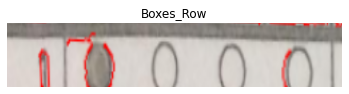

In [6]:
print(x)
fig.add_subplot(rows, columns, r)
plt.imshow(Boxes_Row[0])
plt.axis('off')
plt.title("Boxes_Row")

In [7]:
for b, Box in enumerate(Boxes_Row):
    Boxes=splitBoxes(Boxes_Row[b],1,5)
    Boxes.pop(0)
    x = len(Boxes)
    Cho=[]
    #print(x)
    for ch, Choie in enumerate(Boxes):
        #thresh = cv2.threshold(Boxes[ch],200,255, cv2.THRESH_BINARY)[1]
        gray = cv2.cvtColor(Boxes[ch], cv2.COLOR_BGR2GRAY)
        ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)
        Cho.append(cv2.countNonZero(thresh))
    selectChoie=np.argmax(Cho)
    print(selectChoie," ",b," ")



1   0  
2   1  
0   2  
0   3  
0   4  
1   5  
1   6  
0   7  
3   8  
2   9  
0   10  
0   11  
0   12  
1   13  
1   14  
0   15  
0   16  
0   17  
0   18  
0   19  
2   20  
2   21  
0   22  
0   23  
2   24  
2   25  
2   26  
2   27  
2   28  
2   29  
2   30  
2   31  
2   32  
1   33  
0   34  
1   35  
1   36  
1   37  
1   38  
1   39  
1   40  
0   41  
0   42  
0   43  
2   44  
1   45  
0   46  
1   47  
1   48  
1   49  
1   50  
1   51  
1   52  
2   53  
3   54  
2   55  
2   56  
2   57  
2   58  
2   59  
2   60  
2   61  
2   62  
2   63  
1   64  
2   65  
2   66  
2   67  
2   68  
2   69  
2   70  
2   71  
2   72  
2   73  
2   74  
2   75  
2   76  
2   77  
1   78  
0   79  


Text(0.5, 1.0, 'Boxes')

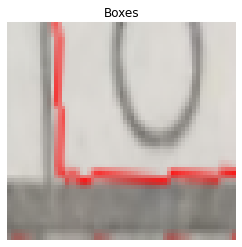

In [8]:
fig.add_subplot(rows, columns, 1)
plt.imshow(Boxes[0])
plt.axis('off')
plt.title("Boxes")

In [3]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import tensorflow as tf; print(tf.reduce_sum(tf.random.normal([1000, 1000])))

tf.Tensor(466.26697, shape=(), dtype=float32)


In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1
